In [1]:
import pandas as pd

url = ("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")

dados = pd.read_csv(url)




In [21]:
#Tratamento de dados.


In [64]:
dados.Valor.str.split(expand=True)
valores = dados.Valor.str.split(expand=True)
valores.head()


,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None


In [78]:
dados[["moeda", "qtd", "modal"]] = valores



In [103]:
dados1 = dados[dados["modal"].isnull()]
dados1.qtd.str.replace(".","").astype(float)
dados1.qtd = dados1.qtd.str.replace(".","").astype(float)
dados1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,moeda,qtd,modalidade,modal
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,R$,7000000.00,None,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,R$,3700000.00,None,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,R$,380000.00,None,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,R$,685000.00,None,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,R$,540000.00,None,None


In [46]:
#Desafio Aula 2
#Criar uma escala de valores em milhões
#Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
#Preço do metro quadrado por bairro e plotar em um gráfico ideal
#Explorar as bibliotecas de visualizações e colocar as suas conclusão
#Pesquisar um visualização para analisar os quartis, mediana e outliers

In [104]:
1 #Criar uma escala de valores em milhões 

dados1.qtd = dados1.qtd/1000000


dados1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,moeda,qtd,modalidade,modal
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,R$,7.00,None,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,R$,3.70,None,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,R$,0.38,None,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,R$,0.69,None,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,R$,0.54,None,None


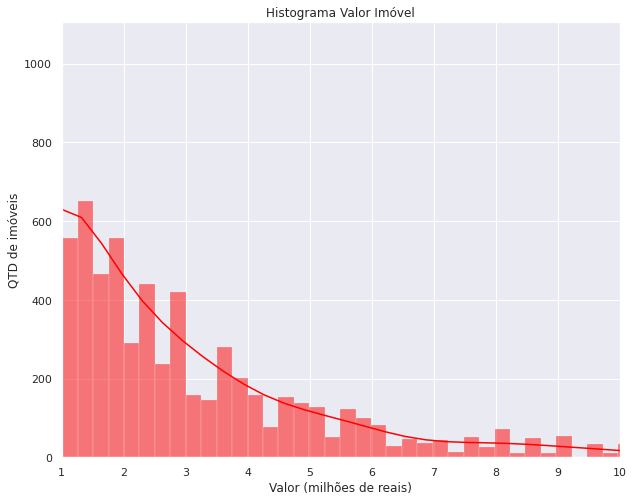

In [143]:
##################################### DESAFIO 2 
#Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
import seaborn as sns  
import matplotlib.pyplot as plt 

sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data = dados1, x = "qtd", color = "red", kde=True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((1,10)) #exclui o primeiro imovel para retirar o extremo.
plt.xlabel("Valor (milhões de reais)")
plt.ylabel("QTD de imóveis")
plt.show()

In [164]:
##################################### DESAFIO 3
#Preço do metro quadrado por bairro e plotar em um gráfico ideal

dados1[['Bairro', "Metragem", "qtd"]].groupby("Bairro", as_index=False).mean()

valor_metro = dados1[['Bairro', "Metragem", "qtd"]].groupby("Bairro", as_index=False).mean()

valor_metro.head()




,Bairro,Metragem,qtd
0,Aclimação,246.16,1.76
1,Alto da Boa Vista,418.88,2.39
2,Alto da Lapa,299.25,2.08
3,Alto da Mooca,270.05,1.18
4,Alto de Pinheiros,429.85,4.78


In [168]:
valor_metro["valor/m²"] = valor_metro["qtd"]/valor_metro["Metragem"]
valor_metro["valor/m²"] = valor_metro["valor/m²"]*1000000
valor_metro.head()

,Bairro,Metragem,qtd,valor/m²
0,Aclimação,246.16,1.76,7162.69
1,Alto da Boa Vista,418.88,2.39,5708.74
2,Alto da Lapa,299.25,2.08,6961.30
3,Alto da Mooca,270.05,1.18,4385.00
4,Alto de Pinheiros,429.85,4.78,11126.34


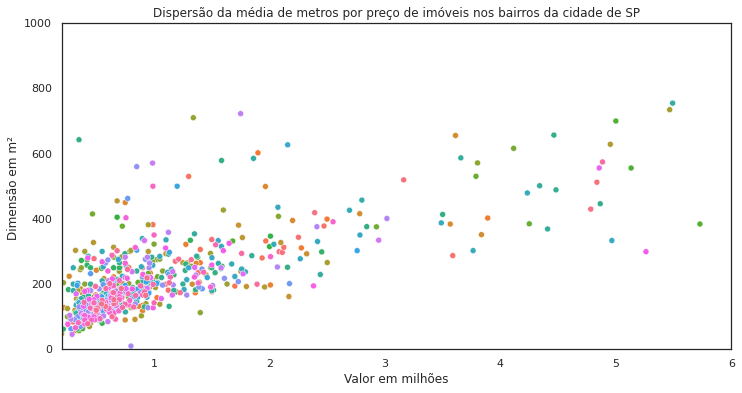

In [198]:
sns.set_style("white")
loc4 = plticker.MultipleLocator(base=100)
plt.figure(figsize = (12,6))
plt.xlim(0.2, 6)
plt.ylim(0, 1000)
plt.xlabel("Valor em milhões")
plt.ylabel("Dimensão em m² ")
bx = sns.scatterplot(x=valor_metro["qtd"], y=valor_metro["Metragem"], hue = valor_metro["Bairro"])
bx.set_title("Dispersão da média de metros por preço de imóveis nos bairros da cidade de SP")
bx.get_legend().remove()